In [193]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
del torch
from scipy import signal

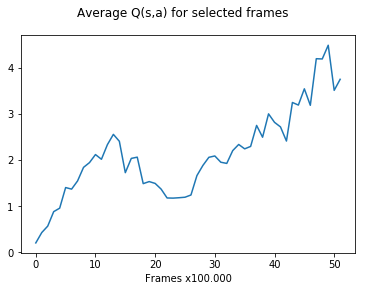

In [30]:
stats = pd.read_csv('baseline_results/baseline_results/stats.csv')
ax = plt.figure()
ax.suptitle('Average Q(s,a) for selected frames')
plt.xlabel('Frames x100.000')
plt.plot(stats['avg_q'])
ax.title = 'Avg Q'

Text(0.5, 0, 'Frames x100.000')

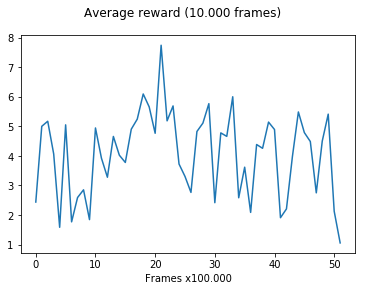

In [31]:
ax = plt.figure()
ax.suptitle('Average reward (10.000 frames)')
plt.plot(stats['avg_reward'])
plt.xlabel('Frames x100.000')

In [329]:
from cv2 import matchTemplate, TM_CCORR_NORMED, imread, TM_CCORR
import numpy as np

class Template(object):
    def __init__(self, path, obj_type, stamp_dir=False):
        self.path = path
        self.obj_type = obj_type
        self.image = imread(path, 0)
        
        if stamp_dir:
            self._load_stamp(stamp_dir)
        else:
            self.stamp = 1
    
    def _load_stamp(self, stamp_dir):
        self.stamp = imread(stamp_dir + self.obj_type + '.png', 0)
        
    @property
    def has_stamp(self):
        return type(self.stamp) != int

    @property
    def channel(self):
        return {
            'barrier' : 2,
            'enemy' : 0,
            'agent' : 1
        }[self.obj_type]
    
    @property
    def shape(self):
        if self.has_stamp:
            return self.stamp.shape
        else:
            return self.image.shape

def object_locations(template, image, threshold):
    correlations = matchTemplate(image, template, TM_CCORR_NORMED)
    return np.array(np.where(correlations > threshold)).T

def create_stamps(template, image, coordinates):

    canvas = np.zeros_like(image)
    height, width = template.shape
    
    # calculate offsets based on image boundaries
    y_offset = np.minimum(coordinates[:,0] + height, image.shape[0])
    x_offset = np.minimum(coordinates[:,1] + width, image.shape[1])
        
    for i, (y, x) in enumerate(coordinates):
        canvas[y:y_offset[i], x:x_offset[i]] = template.stamp

    return canvas

def mask(templates, image, threshold):
    channels = np.zeros((image.shape[0], image.shape[1], 3))
    for template in templates:
        coords = object_locations(template.image, image, threshold)
        obj_channel = create_stamps(template, image, coords)
        channels[:,:,template.channel] += obj_channel
    
    return channels

# object_locations
# 1.31 ms ± 44 µs per loop (mean ± std. dev. of 7 runs, 100 loops each) [TM_CCORR_NORMED]
# 875 µs ± 37.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each) [TM_CCOR, manual normalization]

In [330]:
masked_obs = mask([enm_templates[0], ego_template, def_template], image, 0.90)

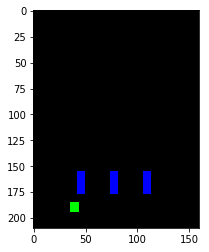

In [332]:
plt.imshow(masked_obs_naive)

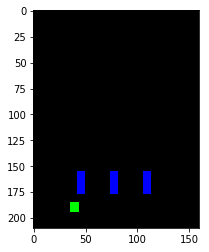

In [333]:
plt.imshow(masked_obs)

In [239]:
%timeit matchTemplate(image, template, cv2.TM_CCOEFF)

1.05 ms ± 84.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [240]:
%timeit matchTemplate(image, template, cv2.TM_CCORR)

679 µs ± 44.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [241]:
%timeit matchTemplate(image, template, cv2.TM_SQDIFF)

1.01 ms ± 95 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [315]:
STAMP_DIR = False #'dqn/object_types/'
def_template = Template('dqn/space_invader_sprites/defense.png', 'barrier', stamp_dir=STAMP_DIR)
ego_template = Template('dqn/space_invader_sprites/my_sprite.png', 'agent', stamp_dir=STAMP_DIR)
enm_templates = [
    Template('dqn/space_invader_sprites/enemy_0_a.png', 'enemy', stamp_dir=STAMP_DIR),
    Template('dqn/space_invader_sprites/enemy_0_b.png', 'enemy', stamp_dir=STAMP_DIR),
    Template('dqn/space_invader_sprites/enemy_1_a.png', 'enemy', stamp_dir=STAMP_DIR),
    Template('dqn/space_invader_sprites/enemy_1_b.png', 'enemy', stamp_dir=STAMP_DIR),
    Template('dqn/space_invader_sprites/enemy_2_a.png', 'enemy', stamp_dir=STAMP_DIR),
    Template('dqn/space_invader_sprites/enemy_2_b.png', 'enemy', stamp_dir=STAMP_DIR),
    Template('dqn/space_invader_sprites/enemy_3_a.png', 'enemy', stamp_dir=STAMP_DIR),
    Template('dqn/space_invader_sprites/enemy_3_b.png', 'enemy', stamp_dir=STAMP_DIR),
    Template('dqn/space_invader_sprites/enemy_4_a.png', 'enemy', stamp_dir=STAMP_DIR),
    Template('dqn/space_invader_sprites/enemy_4_b.png', 'enemy', stamp_dir=STAMP_DIR),
    Template('dqn/space_invader_sprites/enemy_5_a.png', 'enemy', stamp_dir=STAMP_DIR),
    Template('dqn/space_invader_sprites/enemy_5_b.png', 'enemy', stamp_dir=STAMP_DIR),
    Template('dqn/space_invader_sprites/enemy_bullet.png', 'enemy', stamp_dir=STAMP_DIR)
]

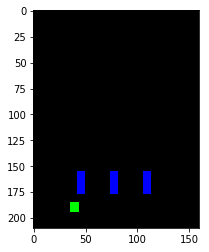

In [286]:
plt.imshow(masked_obs)